<a href="https://colab.research.google.com/github/skaiphd/DeepLearning1625/blob/main/Store_Item_Demand_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
data='/content/train.csv'


Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv(data)
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [12]:
# Display basic information about the dataset
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [11]:
data_description = data.describe()
data_description

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


# Convert 'date' column to datetime

In [14]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year, month, and day
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Sales Distribution

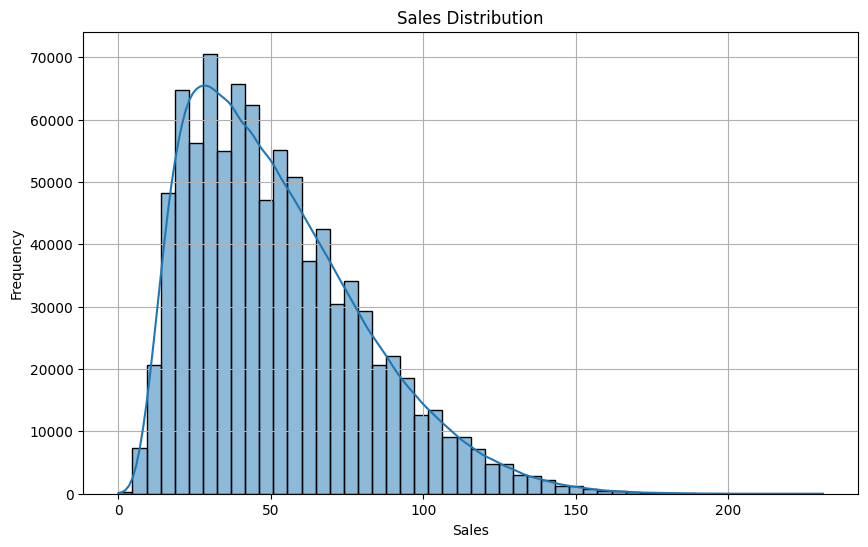

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

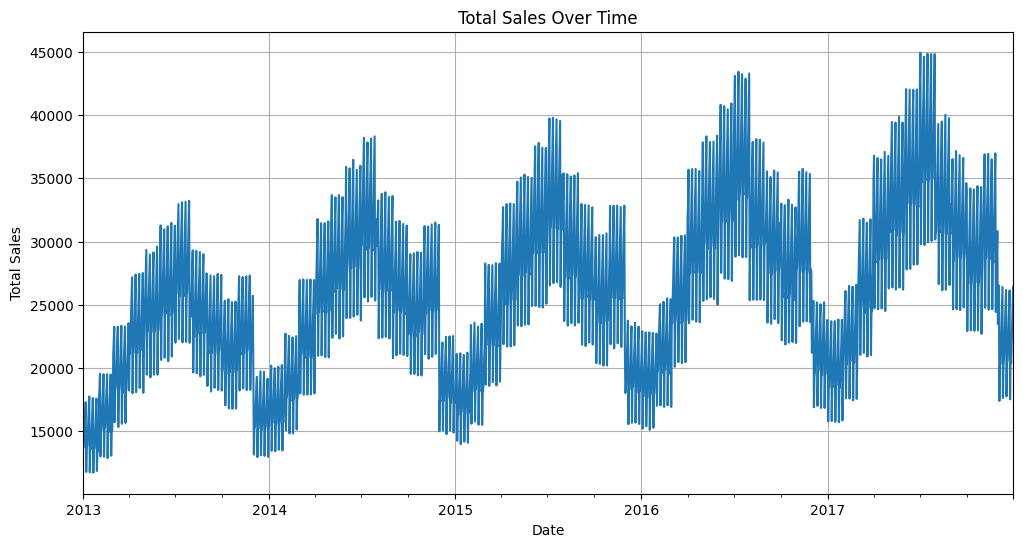

In [16]:
# Sales Trends Over Time
plt.figure(figsize=(12, 6))
data.groupby('date')['sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

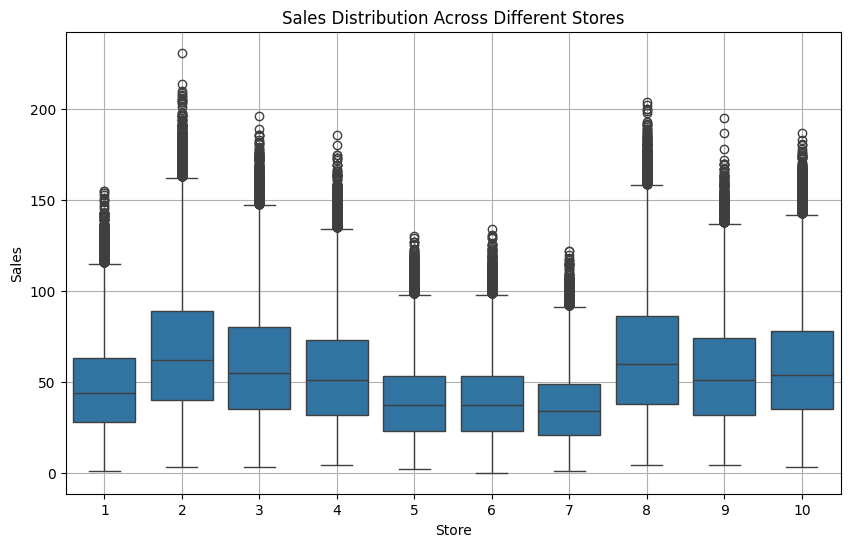

In [17]:
# Sales Across Different Stores
plt.figure(figsize=(10, 6))
sns.boxplot(x='store', y='sales', data=data)
plt.title('Sales Distribution Across Different Stores')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

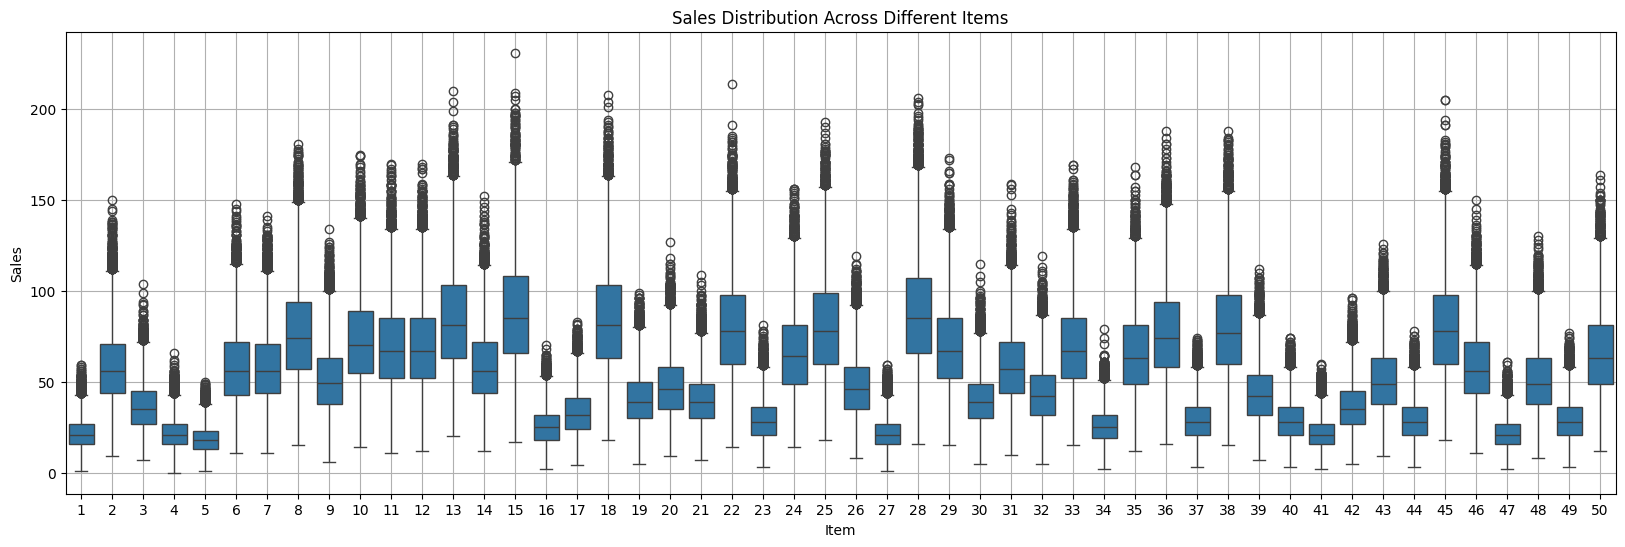

In [19]:
# Sales Across Different Items
plt.figure(figsize=(20, 6))
sns.boxplot(x='item', y='sales', data=data)
plt.title('Sales Distribution Across Different Items')
plt.xlabel('Item')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

The exploratory data analysis (EDA) of the sales dataset provides several insights:

1. Sales Distribution
The sales distribution shows a somewhat skewed pattern, with the majority of sales clustered at the lower end and a few instances of very high sales. This indicates that most days have moderate sales, with occasional spikes.

2. Sales Trends Over Time
When observing total sales over time, there's a visible pattern that might suggest seasonality or specific trends related to time. This could be due to factors like holidays, seasons, or other temporal events affecting sales.

3. Sales Across Different Stores
The boxplot for sales across different stores shows some variation in sales distribution between stores. Some stores consistently have higher sales than others, indicating possible differences in store size, location, customer base, or inventory.

4. Sales Across Different Items
The sales distribution across different items also varies. Some items have higher median sales and wider interquartile ranges, suggesting they are more popular or in demand compared to others.

# Detailed Seasonal Analysis


In [20]:
# Grouping data by year and month to observe seasonal trends
monthly_sales = data.groupby(['year', 'month'])['sales'].sum().reset_index()

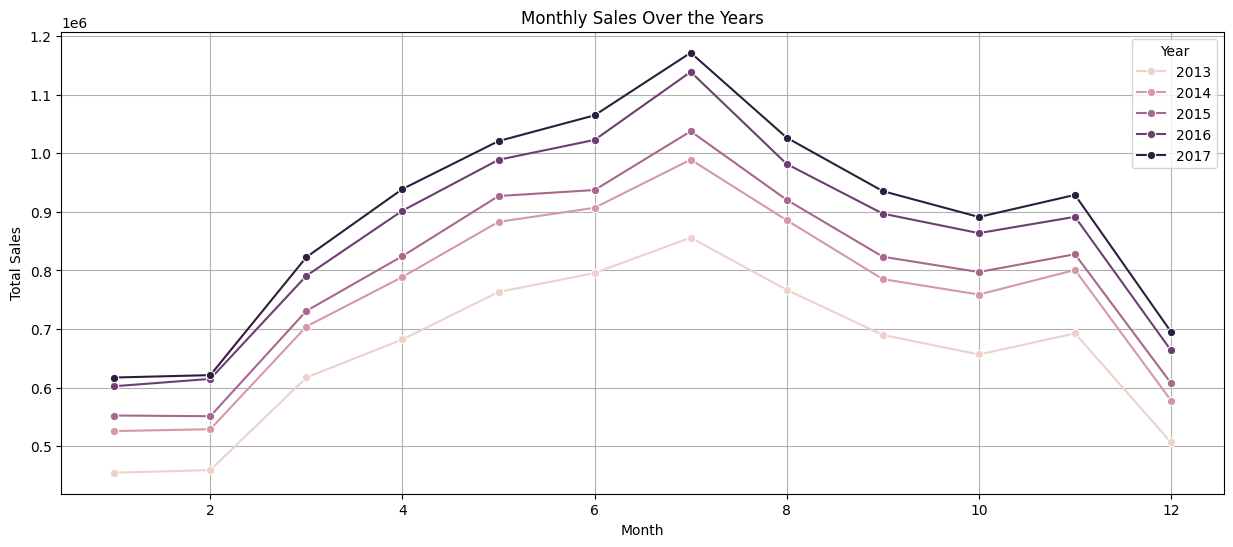

In [21]:
# Plotting monthly sales over the years
plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='sales', hue='year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

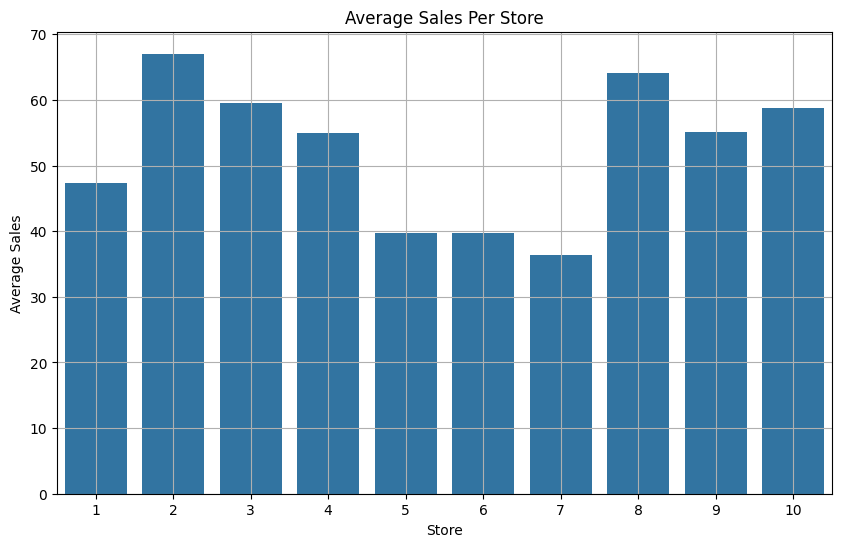

In [22]:
# Investigating Sales Variations Among Stores
# Calculating average sales per store
avg_sales_per_store = data.groupby('store')['sales'].mean().sort_values()

# Plotting average sales per store
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_per_store.index, y=avg_sales_per_store.values)
plt.title('Average Sales Per Store')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

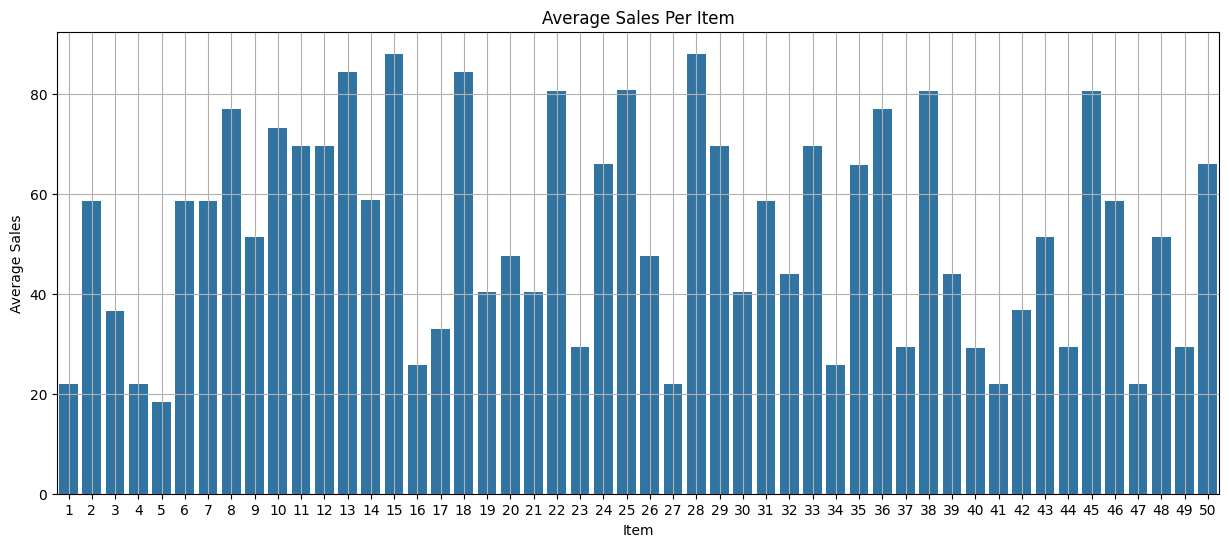

In [23]:
# Identifying the Most Popular Items
# Calculating average sales per item
avg_sales_per_item = data.groupby('item')['sales'].mean().sort_values()

# Plotting average sales per item
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_sales_per_item.index, y=avg_sales_per_item.values)
plt.title('Average Sales Per Item')
plt.xlabel('Item')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

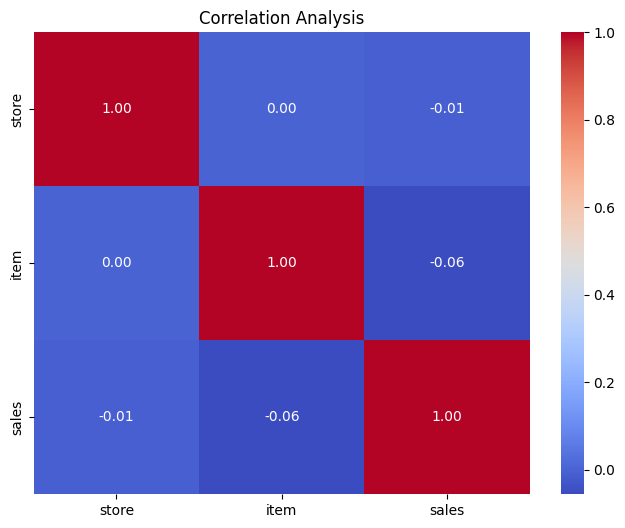

In [24]:
# Correlation Analysis
# Calculating correlation matrix
correlation_matrix = data[['store', 'item', 'sales']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis')
plt.show()

The further analysis of the sales dataset provides additional insights:

1. Detailed Seasonal Analysis
The monthly sales over different years indicate a clear seasonal trend. Sales peak at certain times of the year, which could correspond to specific seasons or holidays. This pattern is consistent across multiple years, suggesting a strong seasonal influence on sales.

2. Investigating Sales Variations Among Stores
The average sales per store show significant variations. Some stores consistently achieve higher average sales than others. This could be due to various factors such as location, store size, customer demographics, or inventory differences.

3. Identifying the Most Popular Items
When looking at the average sales per item, it's evident that some items are more popular than others, as indicated by their higher average sales. This information is valuable for inventory management and marketing strategies.

4. Correlation Analysis
The correlation analysis reveals the relationships between store numbers, item numbers, and sales figures. There seems to be a very low correlation between these variables. This suggests that the sales figures are not strongly dependent on the specific store or item numbers in a direct manner. However, the underlying factors affecting sales at each store or for each item might be more complex and require further investigation.

In [43]:
pip install localpip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.0 MB/s eta 0:00:00


In [45]:
!pip install prophet

In [46]:
from prophet import Prophet

# Aggregating data to daily sales
daily_sales = data.groupby('date')['sales'].sum().reset_index()

# Renaming columns for Prophet
daily_sales.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Initialize the Prophet model
model = Prophet()

# Fit the model with our dataset
model.fit(daily_sales)

# Making future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # Predicting for the next 365 days

# Predicting the future sales
forecast = model.predict(future)

# Displaying the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1_x5dyk6/lxpuobp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1_x5dyk6/g280sa1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45842', 'data', 'file=/tmp/tmp1_x5dyk6/lxpuobp5.json', 'init=/tmp/tmp1_x5dyk6/g280sa1h.json', 'output', 'file=/tmp/tmp1_x5dyk6/prophet_modelpenlq4a6/prophet_model-20240121031619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2186,2018-12-27,23940.745161,21483.078568,26308.931772
2187,2018-12-28,25669.657832,23393.254847,27799.119057
2188,2018-12-29,27426.833543,25099.319323,29844.151881
2189,2018-12-30,29163.579228,26729.474258,31423.361574
2190,2018-12-31,18781.705626,16479.531381,21248.260382
